In [5]:
install.packages(c("neuralnet", "caret", "tidyverse", "mlbench", "e1071")) 

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’




In [0]:
library("neuralnet")
library("caret")
library("tidyverse")
library("mlbench")
library("e1071")

In [8]:
data("PimaIndiansDiabetes")
df <- PimaIndiansDiabetes
str(df)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [0]:
?PimaIndiansDiabetes

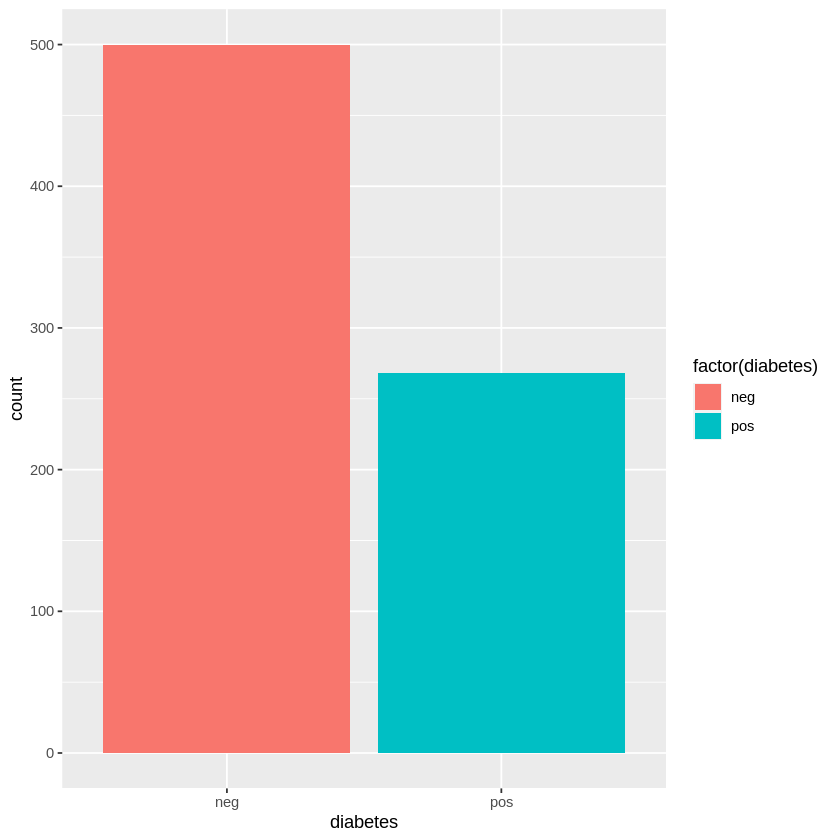

In [10]:
ggplot(df, aes(diabetes, fill = factor(diabetes))) + geom_bar()

In [11]:
df$binary <- ifelse(df$diabetes == "neg", 0, 1)
str(df)

'data.frame':	768 obs. of  10 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...
 $ binary  : num  1 0 1 0 1 0 1 0 1 1 ...


In [12]:
rows = createDataPartition(df$binary, times = 1, p = .7, list = F)

train <- df[rows,]
test <- df[-rows,]

dim(train)
dim(test)

[1] 538  10

[1] 230  10

In [13]:
names(train)
train <- train[,-9]
test <- test[,-9]
names(train)

[1] "pregnant" "glucose"  "pressure" "triceps"  "insulin"  "mass"    
 [7] "pedigree" "age"      "diabetes" "binary"

[1] "pregnant" "glucose"  "pressure" "triceps"  "insulin"  "mass"     "pedigree"
[8] "age"      "binary"

In [0]:
install.packages('C50', repos='cran.us.r-project.org')
install.packages("plyr")

library("C50")
library("plyr")
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
install.packages("ranger")
library("ranger")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [21]:
model <- train(as.factor(binary) ~ .,
              data = train,
              method = "ranger",
              #repeated crossval
              trControl = trainControl(method = "repeatedcv", number = 2, repeats = 2))

model

Random Forest 

538 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 269, 269, 269, 269 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.7741636  0.4881635
  2     extratrees  0.7769517  0.4858570
  5     gini        0.7788104  0.4990292
  5     extratrees  0.7806691  0.5026994
  8     gini        0.7611524  0.4595347
  8     extratrees  0.7788104  0.4983397

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = extratrees
 and min.node.size = 1.

In [22]:
pred_train <- predict(model, train)
pred_test <- predict(model, test)

confusionMatrix(pred_test, as.factor(test$binary))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 132  38
         1  20  40
                                          
               Accuracy : 0.7478          
                 95% CI : (0.6865, 0.8026)
    No Information Rate : 0.6609          
    P-Value [Acc > NIR] : 0.002771        
                                          
                  Kappa : 0.4039          
                                          
 Mcnemar's Test P-Value : 0.025601        
                                          
            Sensitivity : 0.8684          
            Specificity : 0.5128          
         Pos Pred Value : 0.7765          
         Neg Pred Value : 0.6667          
             Prevalence : 0.6609          
         Detection Rate : 0.5739          
   Detection Prevalence : 0.7391          
      Balanced Accuracy : 0.6906          
                                          
       'Positive' Class : 0               
                              